In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


In [41]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fM3Long','fAsym','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1   fM3Long    fAsym  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class']=(df['class']=="g").astype(int)

In [4]:
df

fLength    fWidth   fSize   fConc  fConc1   fM3Long     fAsym  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

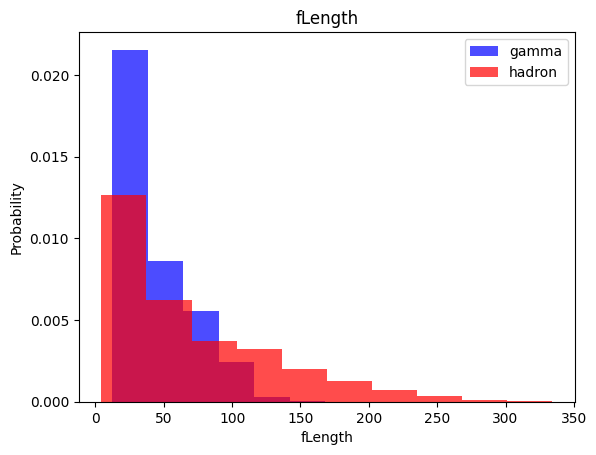

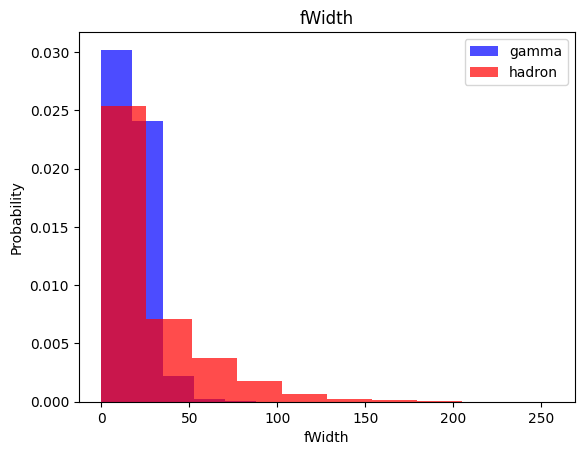

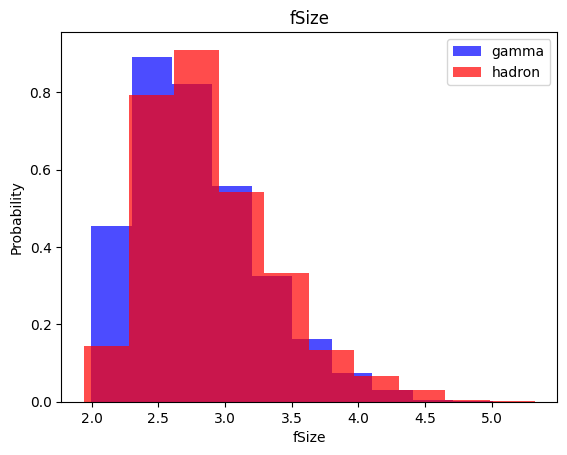

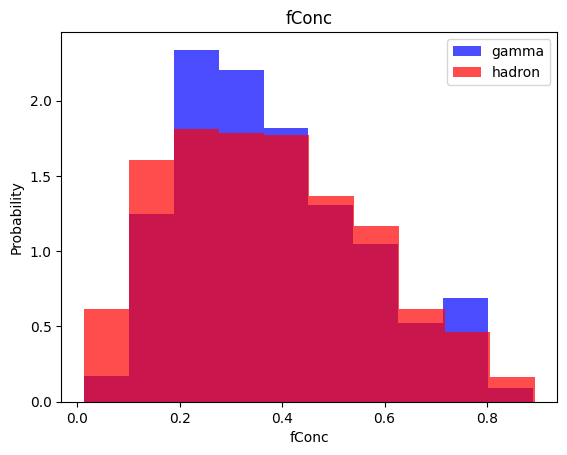

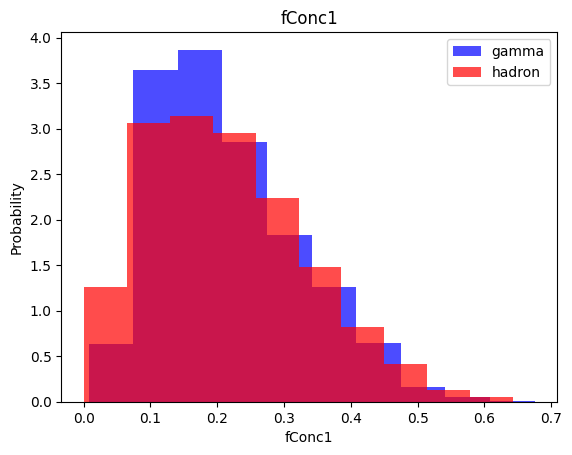

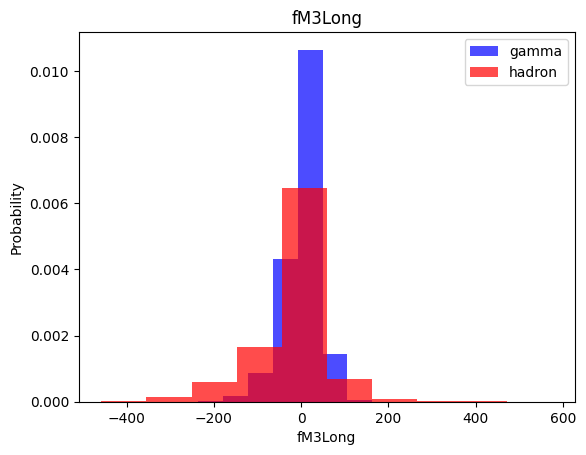

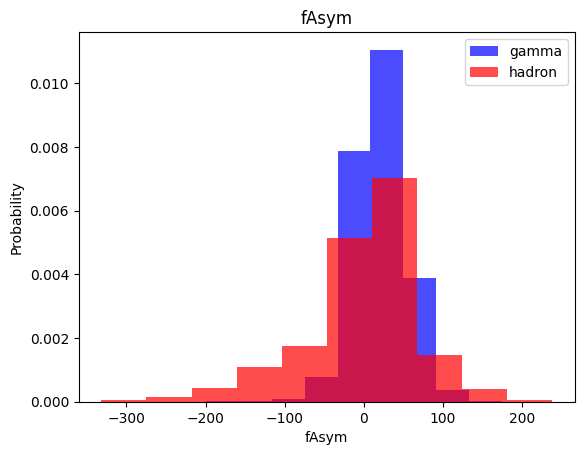

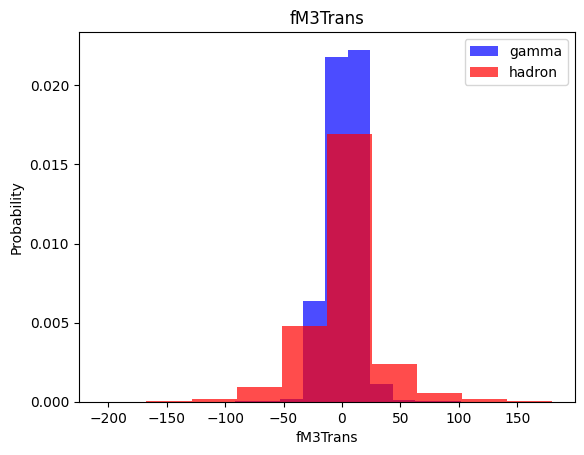

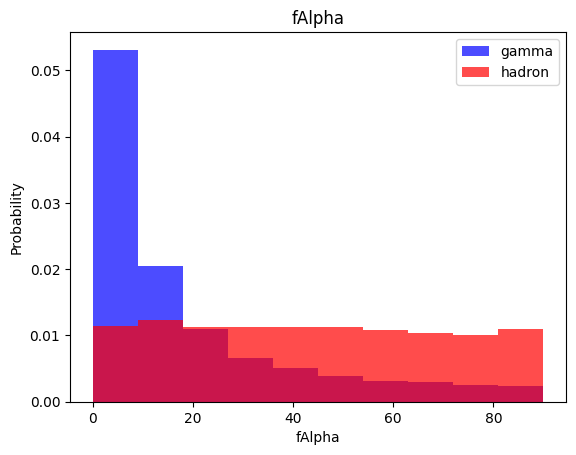

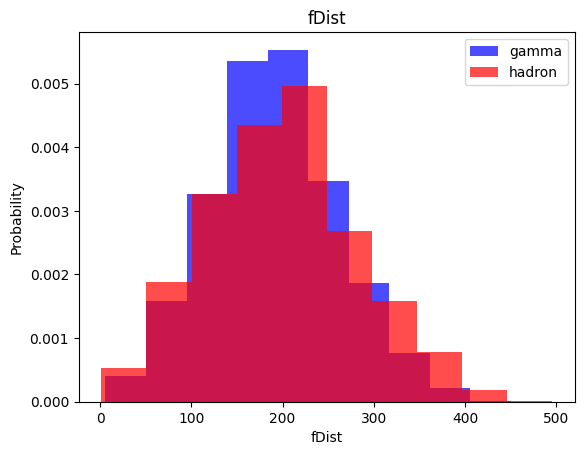

In [5]:
 for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, Test and Valid datasets

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)  # 20% for testing

# Further split train into train and validation
train ,val = train_test_split(train, test_size=0.25, random_state=42)  # 25% of train for validation (0.25 * 0.8 = 0.2 total)

In [7]:
# def scale_dataset(dataframe, oversample=False):
#   X = dataframe[dataframe.columns[:-1]].values
#   y = dataframe[dataframe.columns[-1]].values

#   scaler = StandardScaler()
#   X = scaler.fit_transform(X)

#   if oversample:
#     ros = RandomOverSampler()
#     X, y = ros.fit_resample(X, y)

#   data = np.hstack((X, np.reshape(y, (-1, 1))))

#   return data, X, y


def split_and_preprocess(data_df, feature_columns, target_column):
    X = data_df[feature_columns].values
    y = data_df[target_column].values

    # Oversample using RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    return X_scaled, y_resampled


In [8]:
feature_columns = cols[:len(cols)-1]  # Replace with your actual feature columns
target_column = 'class'

In [9]:
x_train, y_train = split_and_preprocess(train, feature_columns, target_column)
x_val, y_val = split_and_preprocess(val, feature_columns, target_column)
x_test, y_test = split_and_preprocess(test, feature_columns, target_column)

In [10]:
# train, x_train, y_train = scale_dataset(train, oversample=True)
# valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
# test, x_test, y_test = scale_dataset(test, oversample=False)

In [11]:
sum(y_train==1)


7399

In [12]:
sum(y_train==0)


7399

# Models
### K-Nearest Neighbour

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=knn_model.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [16]:
# from IPython.display import Image, display
# display(Image(filename='/content/Precisionrecall.svg.png',width=500, height=800))

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2460
           1       0.77      0.86      0.81      2460

    accuracy                           0.80      4920
   macro avg       0.80      0.80      0.80      4920
weighted avg       0.80      0.80      0.80      4920



### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [20]:
y_pred=nb_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53      2460
           1       0.60      0.90      0.72      2460

    accuracy                           0.65      4920
   macro avg       0.70      0.65      0.63      4920
weighted avg       0.70      0.65      0.63      4920



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred=lg_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      2460
           1       0.75      0.82      0.78      2460

    accuracy                           0.77      4920
   macro avg       0.78      0.77      0.77      4920
weighted avg       0.78      0.77      0.77      4920



### Support Vector(SVM)

In [26]:
from sklearn.svm import SVC


In [27]:
svc_model=SVC()
svc_model.fit(x_train,y_train)


SVC()

In [28]:
y_pred=svc_model.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2460
           1       0.81      0.90      0.85      2460

    accuracy                           0.85      4920
   macro avg       0.85      0.85      0.85      4920
weighted avg       0.85      0.85      0.85      4920



### Neural NetWork

In [30]:
import tensorflow as tf


In [34]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12, 5))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Cross Entropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()



In [35]:
def train_model(x_train,y_train,num_nodes, dropout_prob, lr, batchsize,epochs, x_val,y_val):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batchsize,validation_data=(x_val,y_val),verbose=0)

  return nn_model,history


num_nodes:16,dropout_prob:0,lr:0.01,batchsize:32


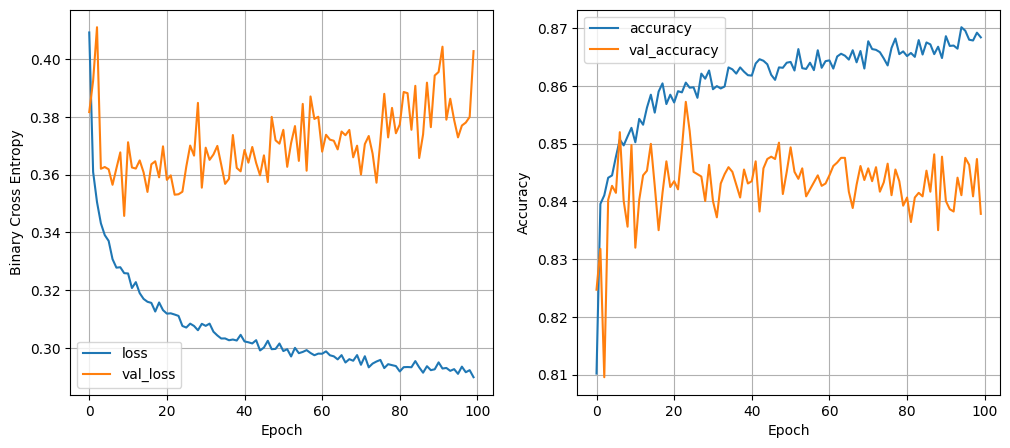

155/155 [==============================] - 0s 3ms/step - loss: 0.4028 - accuracy: 0.8378
num_nodes:16,dropout_prob:0,lr:0.01,batchsize:64


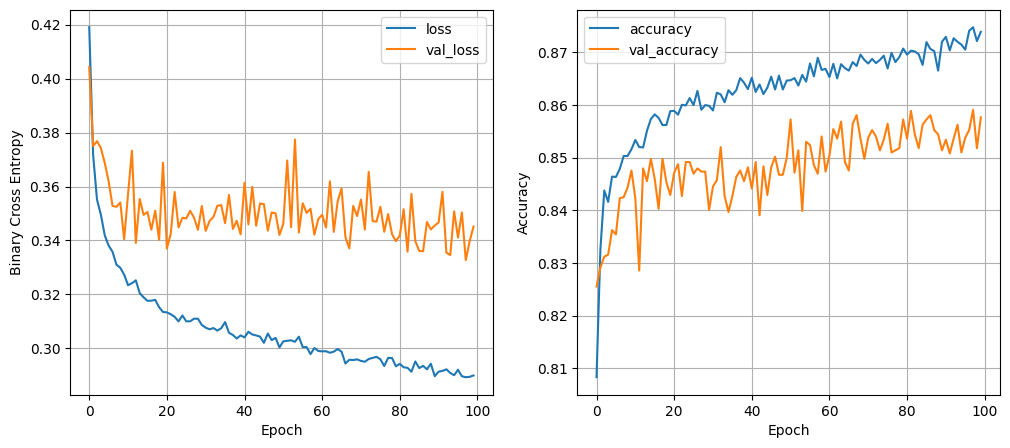

155/155 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8577
num_nodes:16,dropout_prob:0,lr:0.01,batchsize:128


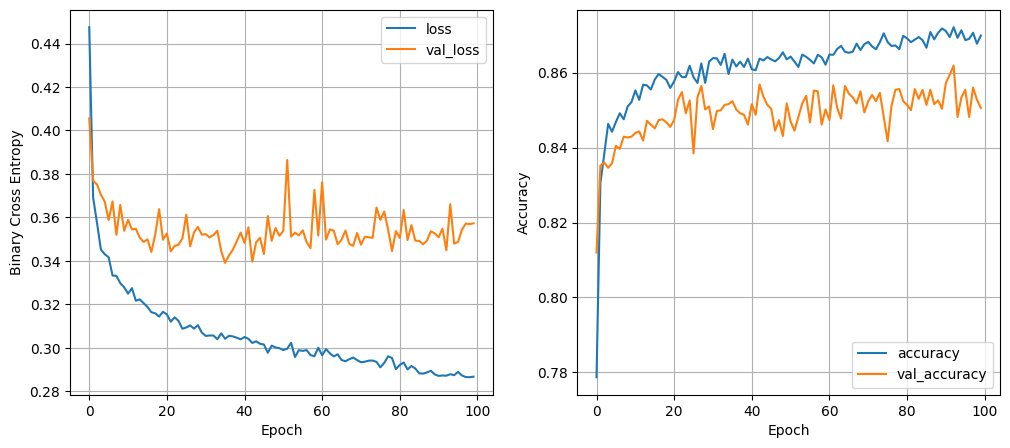

155/155 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8506
num_nodes:16,dropout_prob:0,lr:0.005,batchsize:32


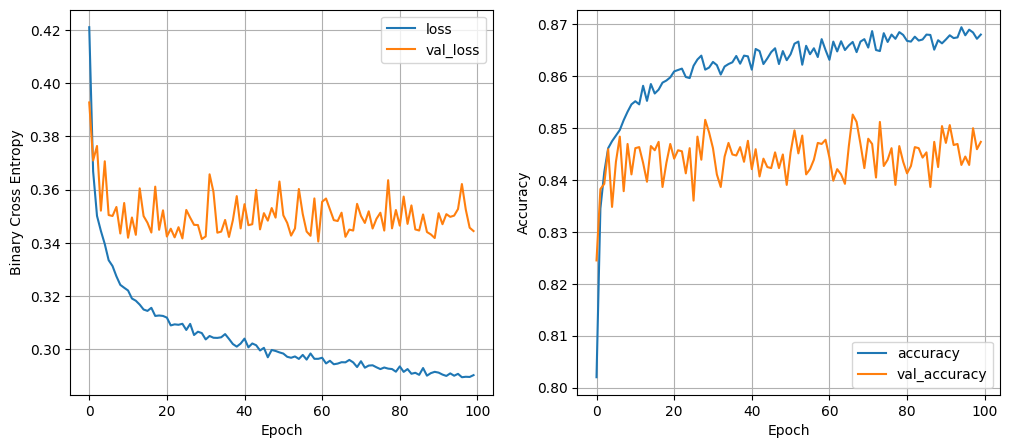

155/155 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8474
num_nodes:16,dropout_prob:0,lr:0.005,batchsize:64


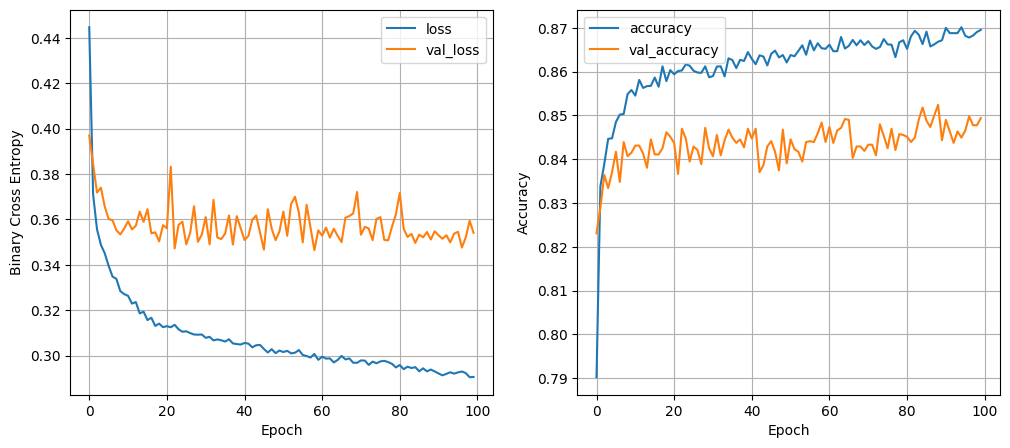

155/155 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8494
num_nodes:16,dropout_prob:0,lr:0.005,batchsize:128


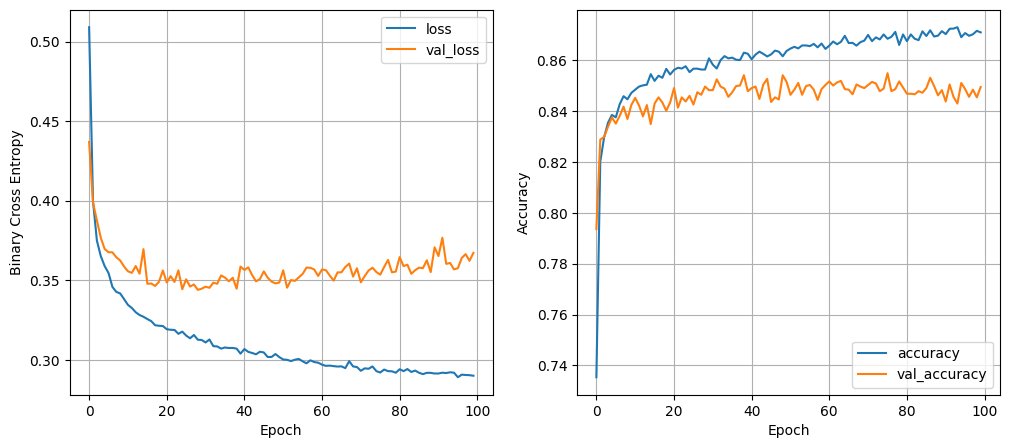

155/155 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8494
num_nodes:16,dropout_prob:0,lr:0.001,batchsize:32


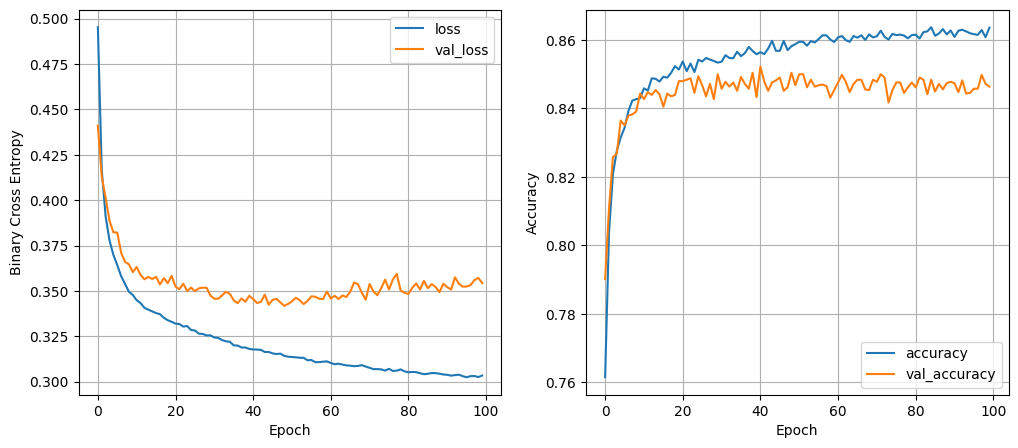

155/155 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8463
num_nodes:16,dropout_prob:0,lr:0.001,batchsize:64


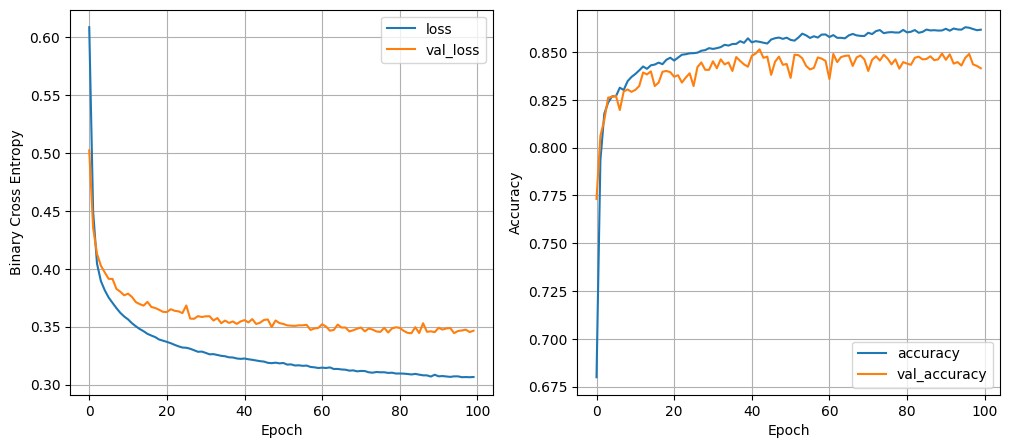

155/155 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8415
num_nodes:16,dropout_prob:0,lr:0.001,batchsize:128


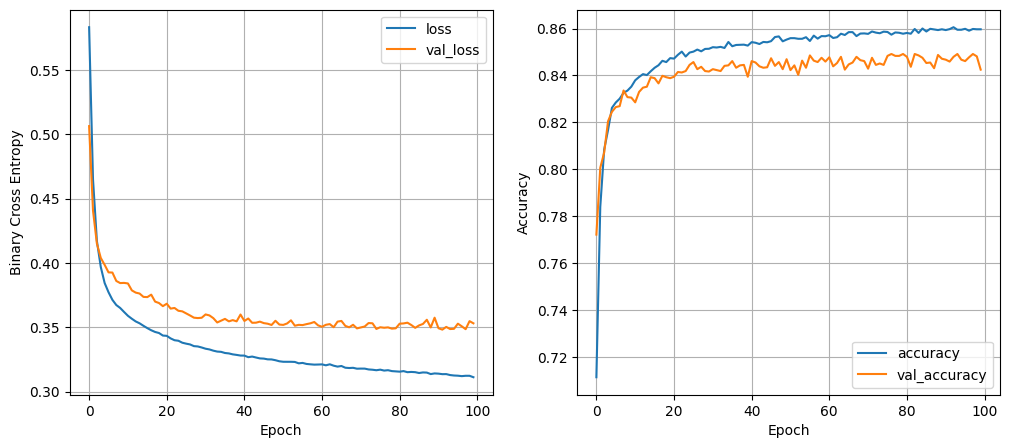

155/155 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8425
num_nodes:16,dropout_prob:0.2,lr:0.01,batchsize:32


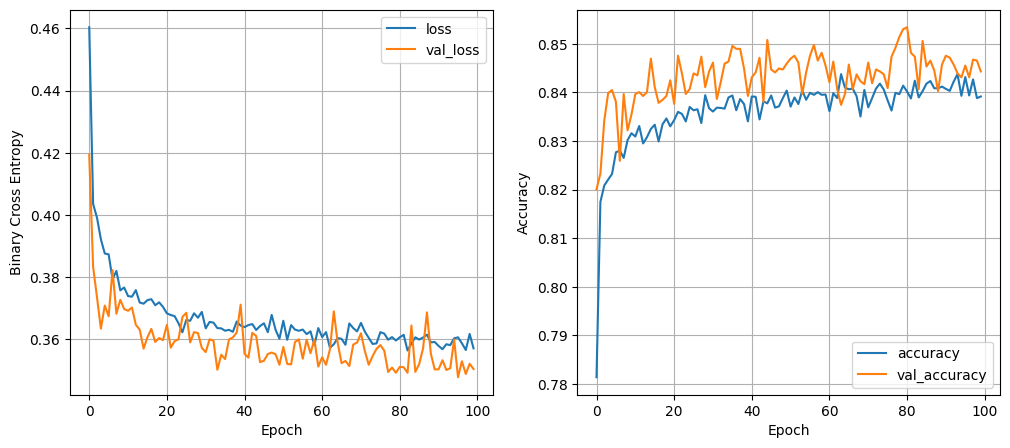

155/155 [==============================] - 1s 4ms/step - loss: 0.3504 - accuracy: 0.8443
num_nodes:16,dropout_prob:0.2,lr:0.01,batchsize:64


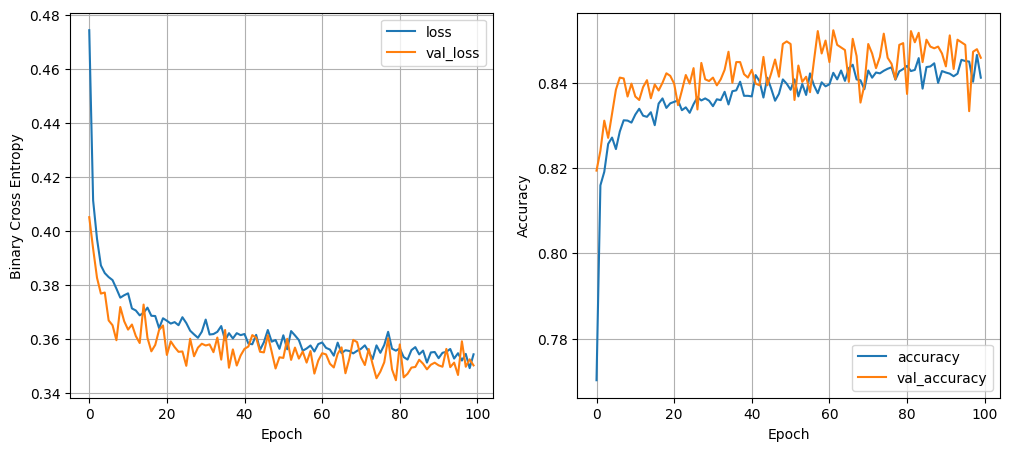

155/155 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8459
num_nodes:16,dropout_prob:0.2,lr:0.01,batchsize:128


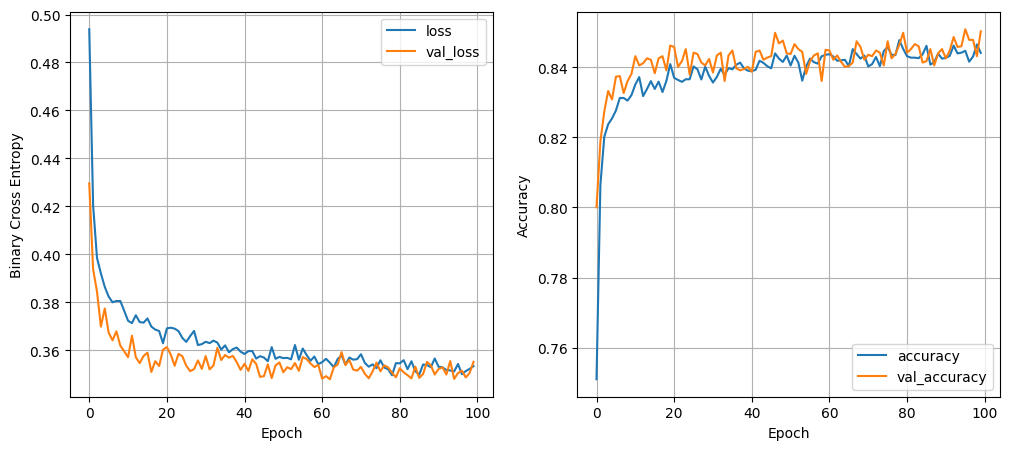

155/155 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8502
num_nodes:16,dropout_prob:0.2,lr:0.005,batchsize:32


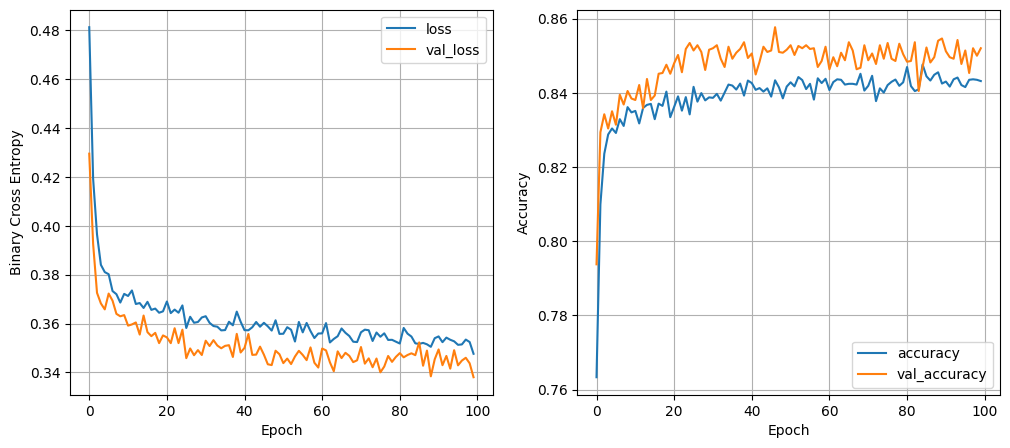

155/155 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8520
num_nodes:16,dropout_prob:0.2,lr:0.005,batchsize:64


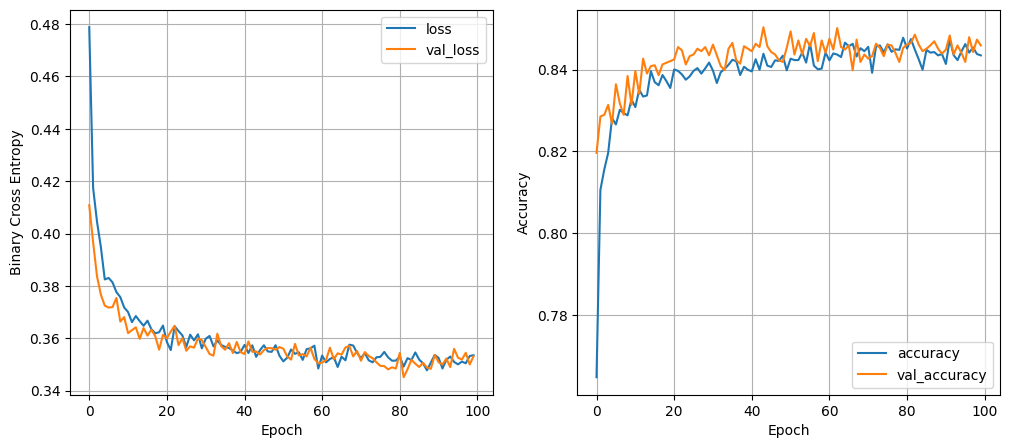

155/155 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8459
num_nodes:16,dropout_prob:0.2,lr:0.005,batchsize:128


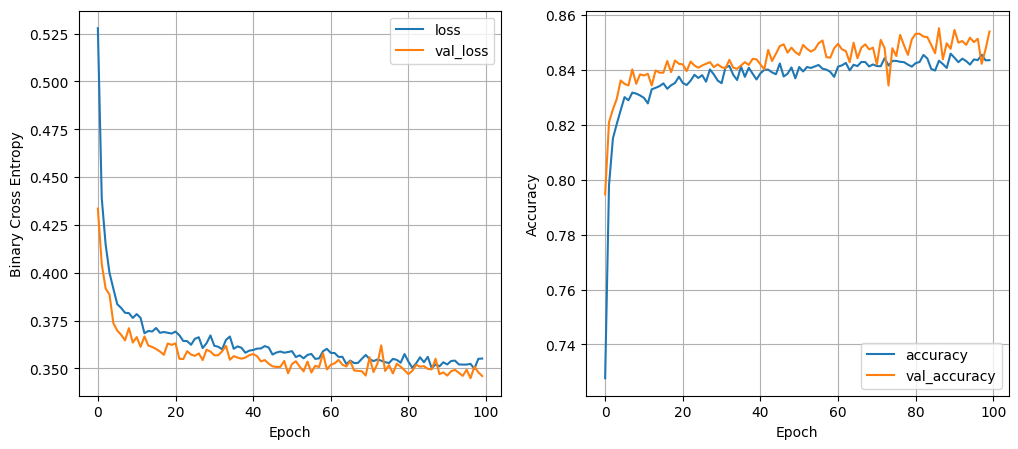

155/155 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8538
num_nodes:16,dropout_prob:0.2,lr:0.001,batchsize:32


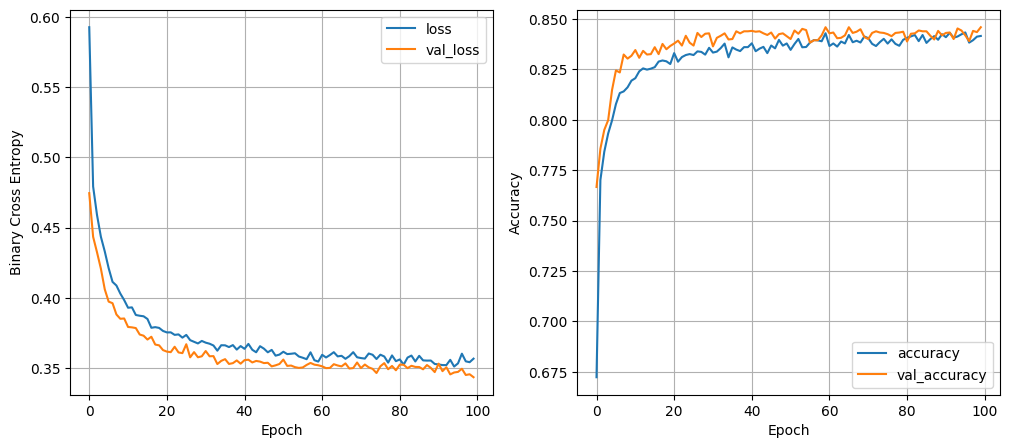

155/155 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8459
num_nodes:16,dropout_prob:0.2,lr:0.001,batchsize:64


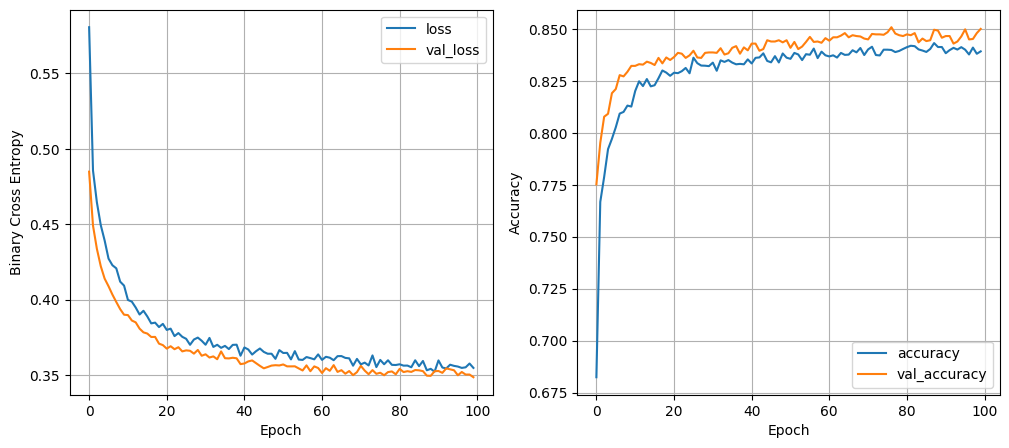

155/155 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.8500
num_nodes:16,dropout_prob:0.2,lr:0.001,batchsize:128


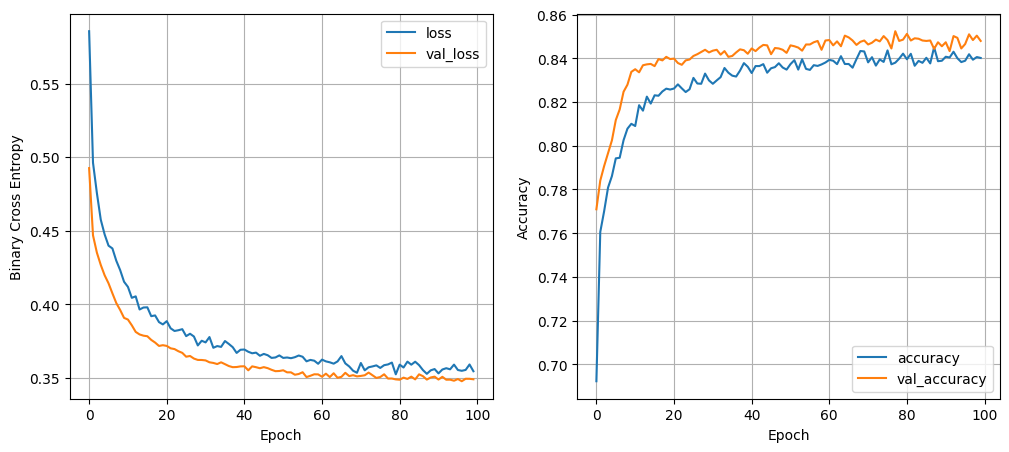

155/155 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8480
num_nodes:32,dropout_prob:0,lr:0.01,batchsize:32


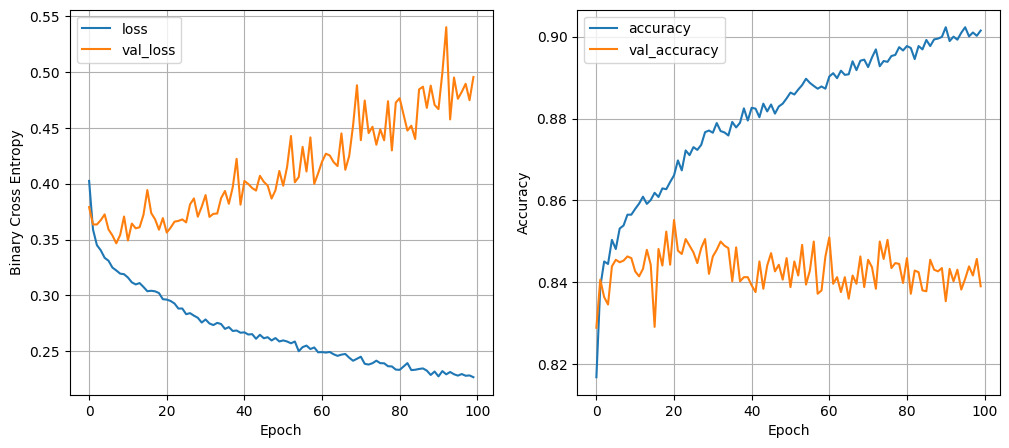

155/155 [==============================] - 1s 3ms/step - loss: 0.4955 - accuracy: 0.8391
num_nodes:32,dropout_prob:0,lr:0.01,batchsize:64


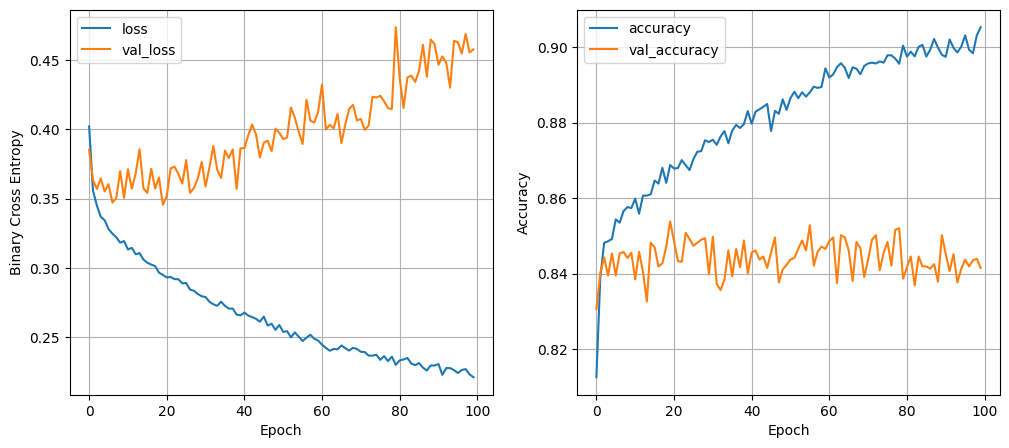

155/155 [==============================] - 1s 4ms/step - loss: 0.4577 - accuracy: 0.8415
num_nodes:32,dropout_prob:0,lr:0.01,batchsize:128


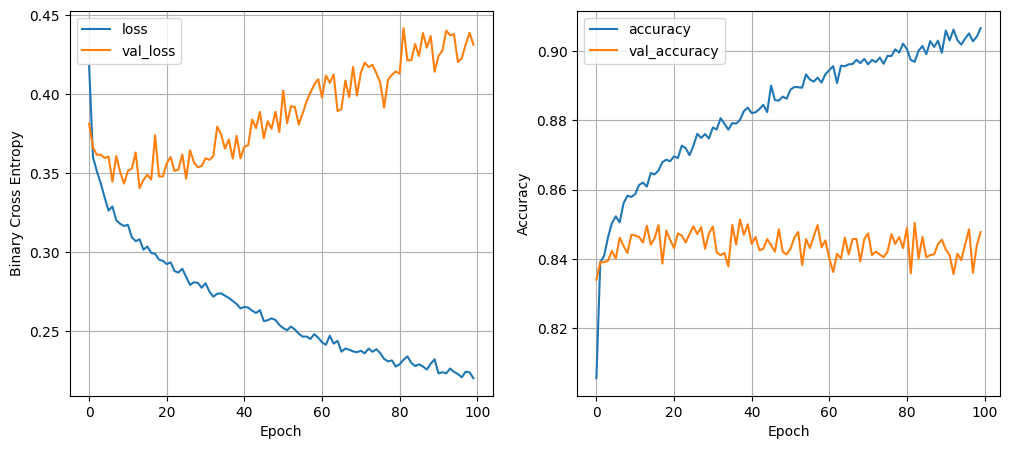

155/155 [==============================] - 1s 4ms/step - loss: 0.4314 - accuracy: 0.8478
num_nodes:32,dropout_prob:0,lr:0.005,batchsize:32


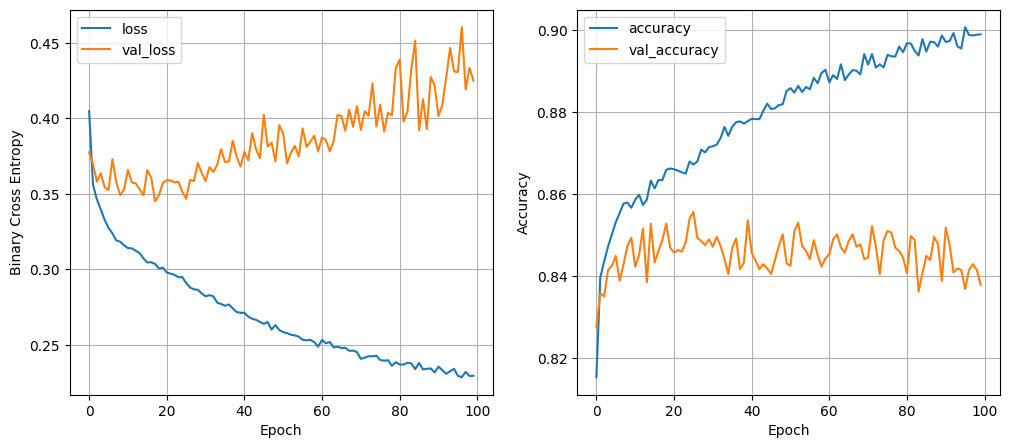

155/155 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8378
num_nodes:32,dropout_prob:0,lr:0.005,batchsize:64


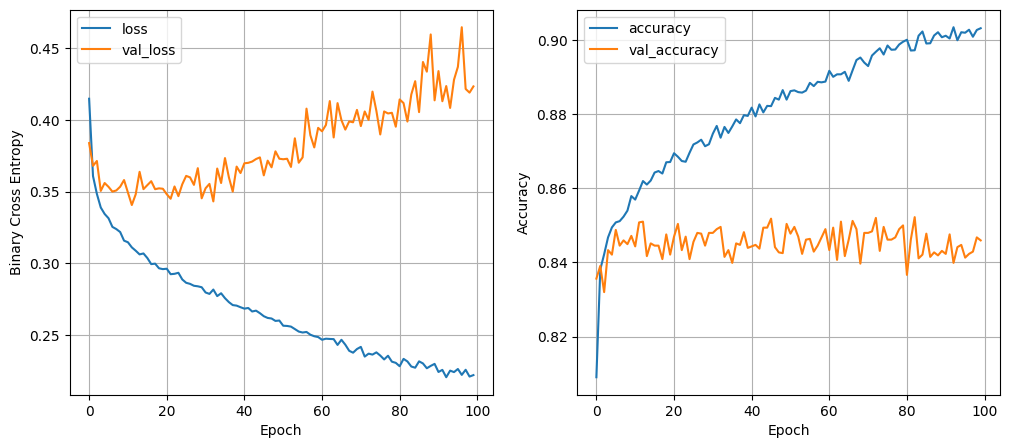

155/155 [==============================] - 1s 4ms/step - loss: 0.4234 - accuracy: 0.8459
num_nodes:32,dropout_prob:0,lr:0.005,batchsize:128


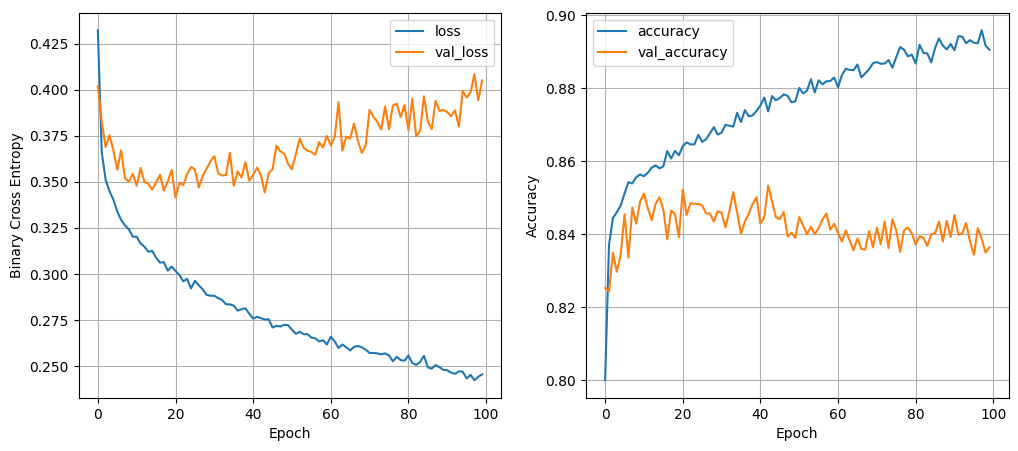

155/155 [==============================] - 1s 3ms/step - loss: 0.4050 - accuracy: 0.8364
num_nodes:32,dropout_prob:0,lr:0.001,batchsize:32


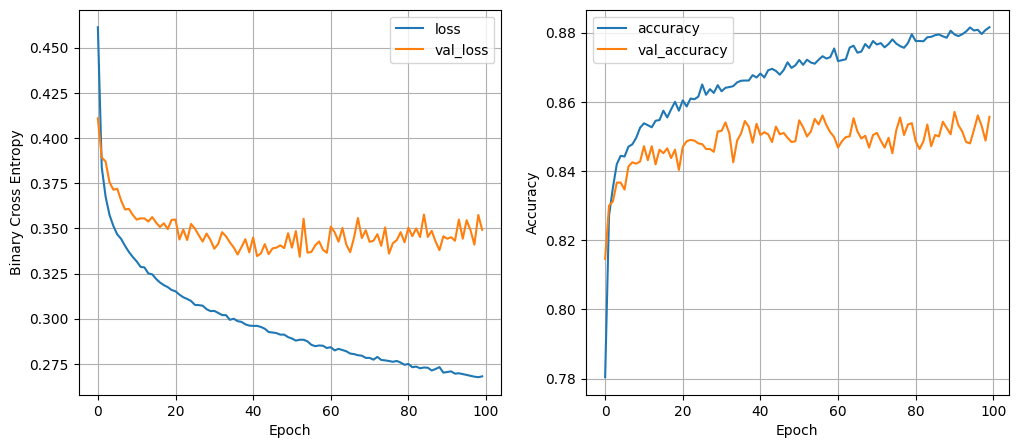

155/155 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8556
num_nodes:32,dropout_prob:0,lr:0.001,batchsize:64


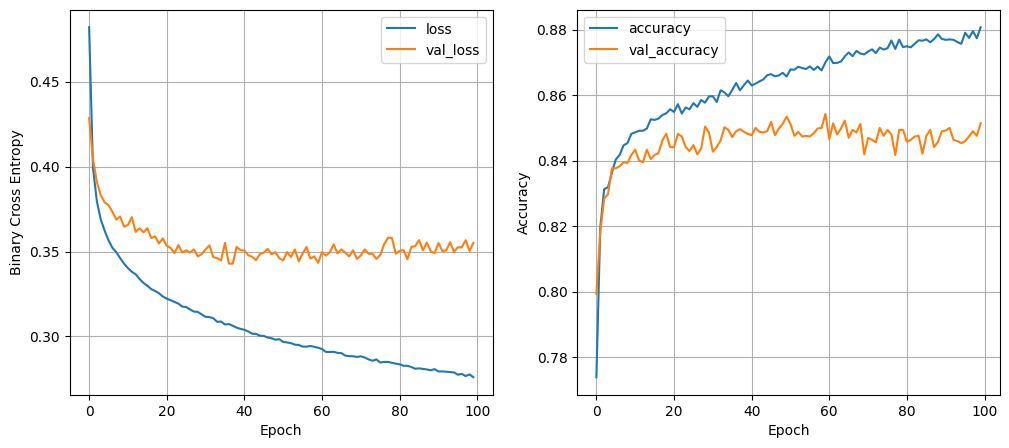

155/155 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.8514
num_nodes:32,dropout_prob:0,lr:0.001,batchsize:128


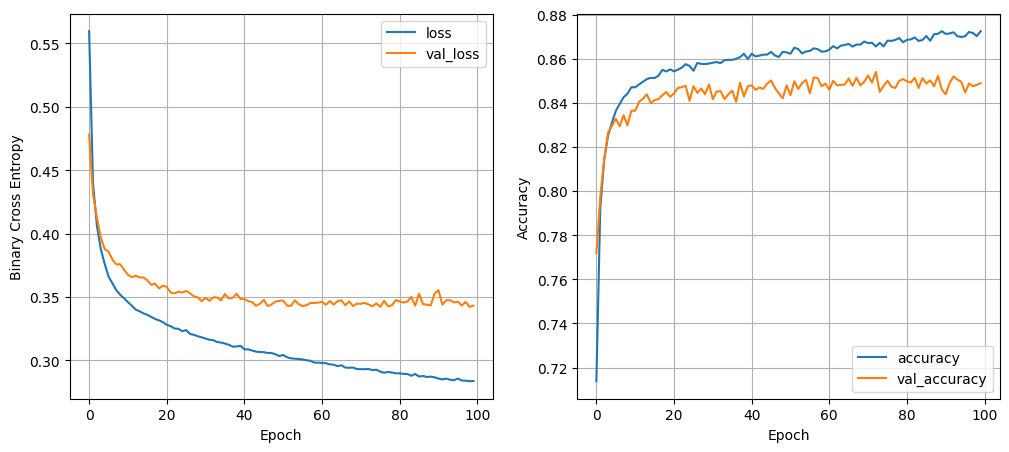

155/155 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8490
num_nodes:32,dropout_prob:0.2,lr:0.01,batchsize:32


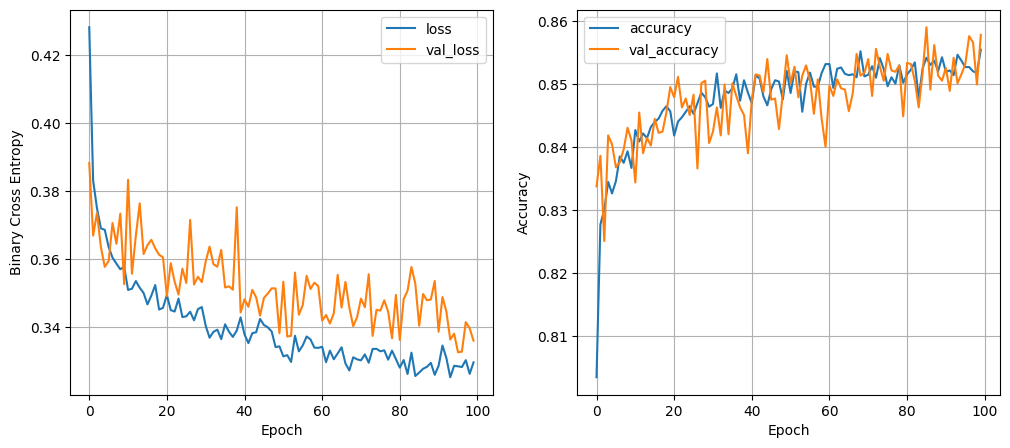

155/155 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8579
num_nodes:32,dropout_prob:0.2,lr:0.01,batchsize:64


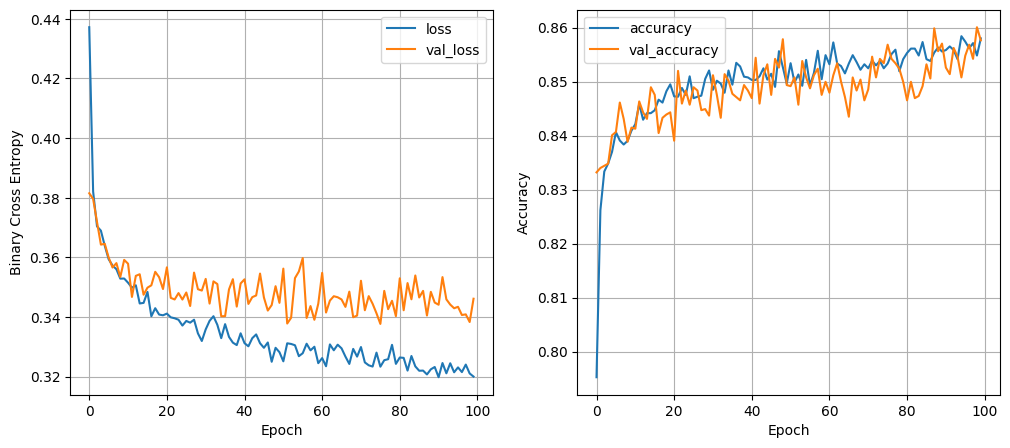

155/155 [==============================] - 1s 4ms/step - loss: 0.3461 - accuracy: 0.8577
num_nodes:32,dropout_prob:0.2,lr:0.01,batchsize:128


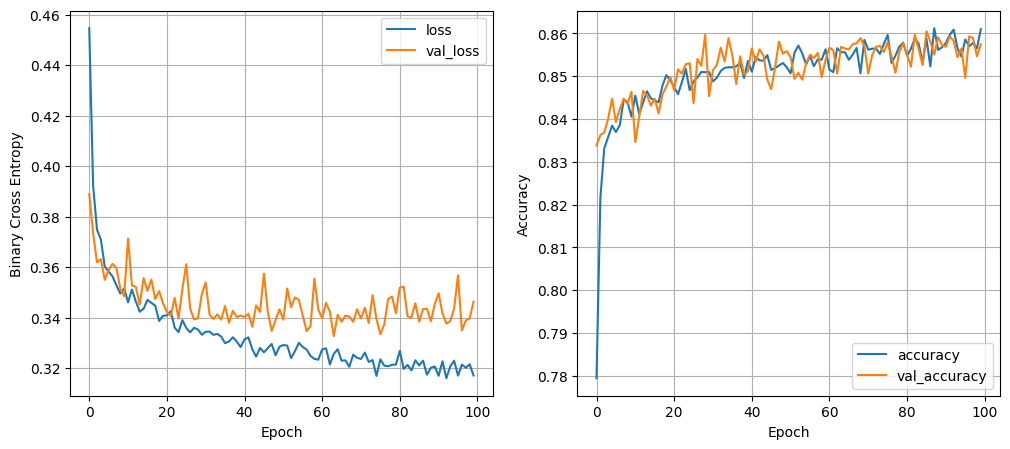

155/155 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8575
num_nodes:32,dropout_prob:0.2,lr:0.005,batchsize:32


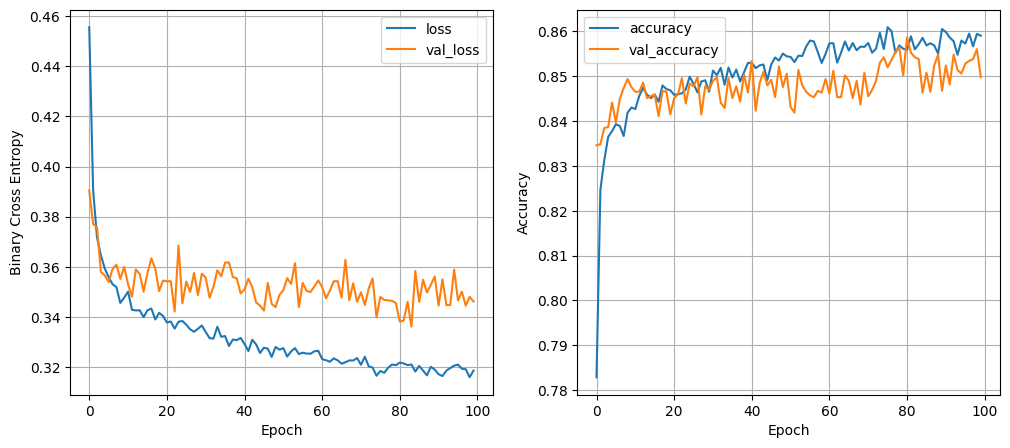

155/155 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8498
num_nodes:32,dropout_prob:0.2,lr:0.005,batchsize:64


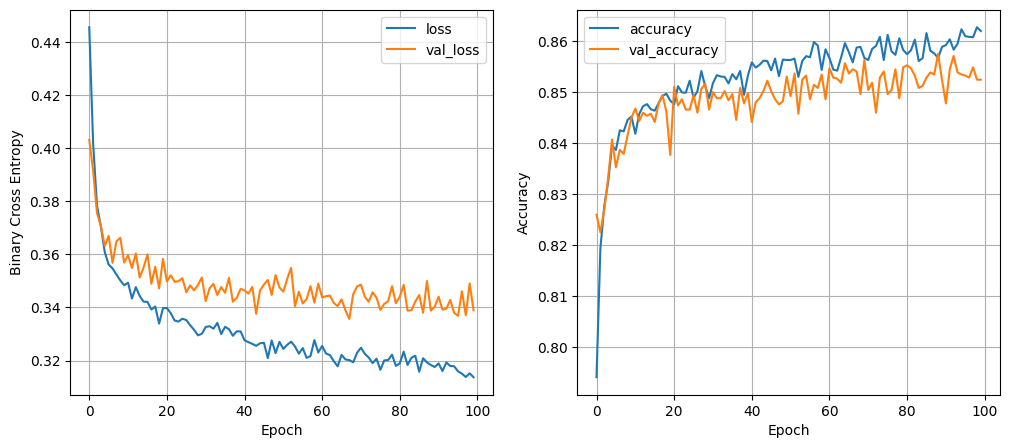

155/155 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8524
num_nodes:32,dropout_prob:0.2,lr:0.005,batchsize:128


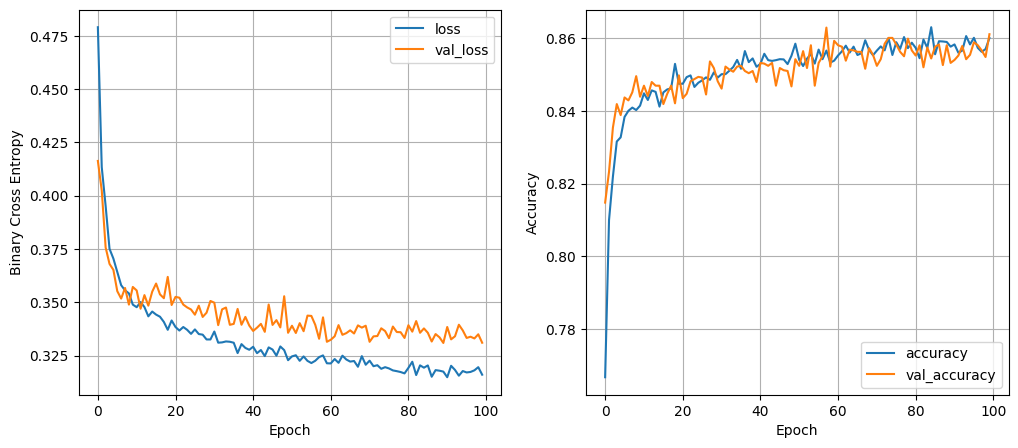

155/155 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8611
num_nodes:32,dropout_prob:0.2,lr:0.001,batchsize:32


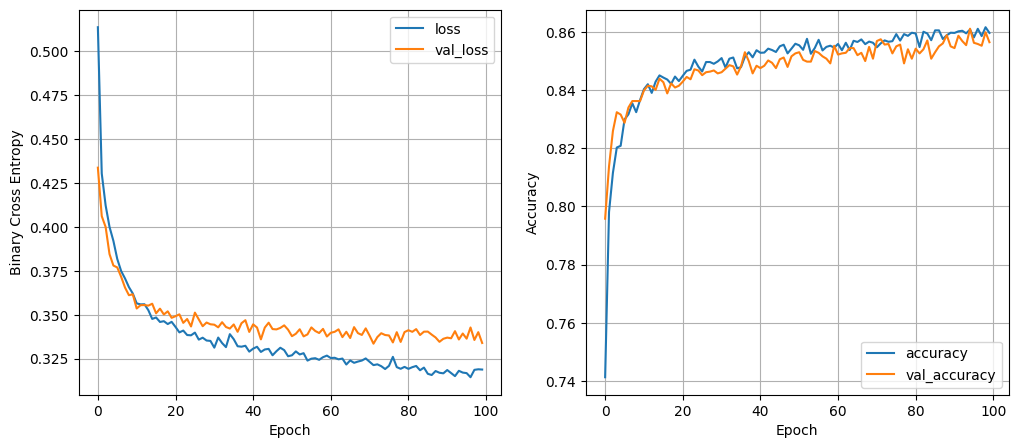

155/155 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8564
num_nodes:32,dropout_prob:0.2,lr:0.001,batchsize:64


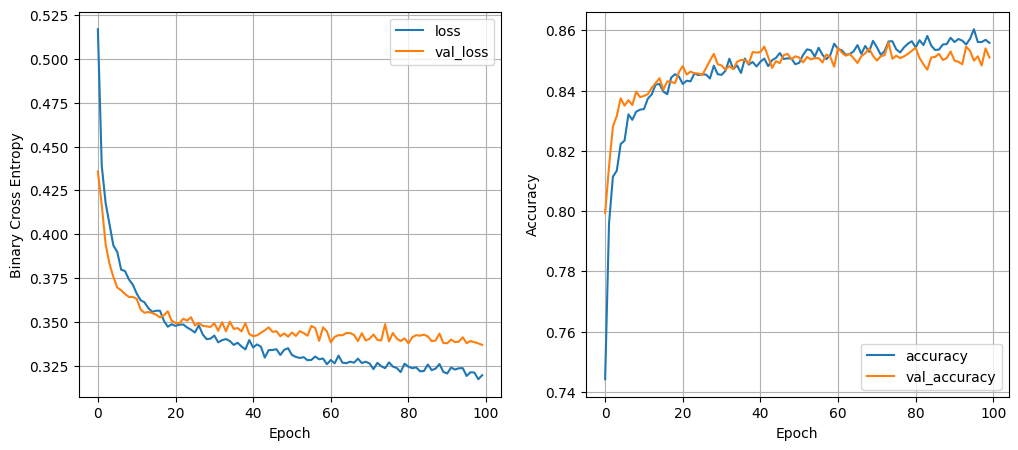

155/155 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8510
num_nodes:32,dropout_prob:0.2,lr:0.001,batchsize:128


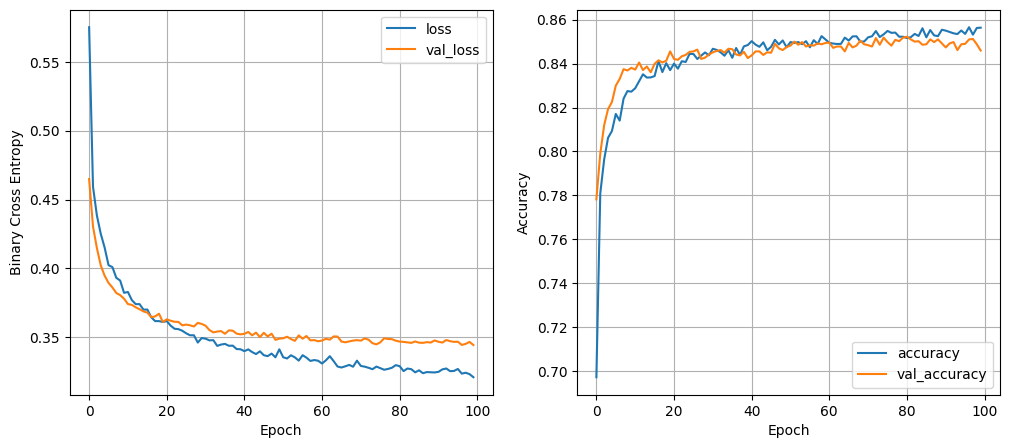

155/155 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8459
num_nodes:64,dropout_prob:0,lr:0.01,batchsize:32


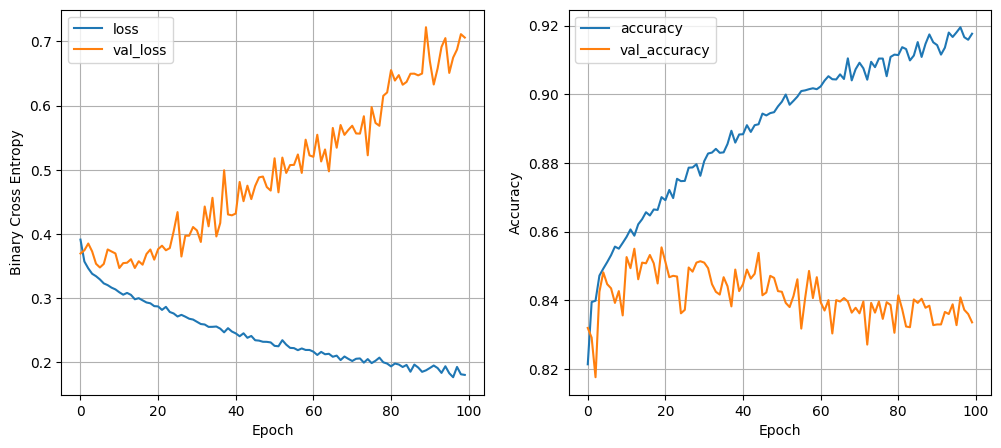

155/155 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.8336
num_nodes:64,dropout_prob:0,lr:0.01,batchsize:64


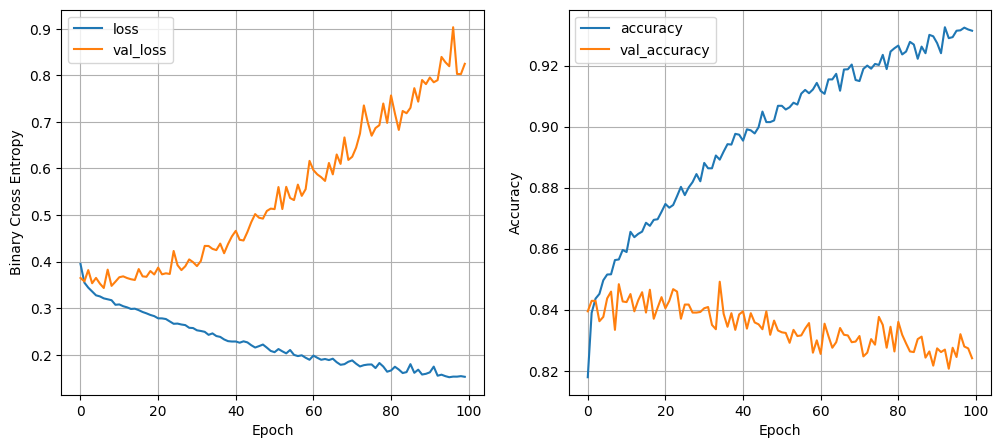

155/155 [==============================] - 0s 3ms/step - loss: 0.8248 - accuracy: 0.8241
num_nodes:64,dropout_prob:0,lr:0.01,batchsize:128


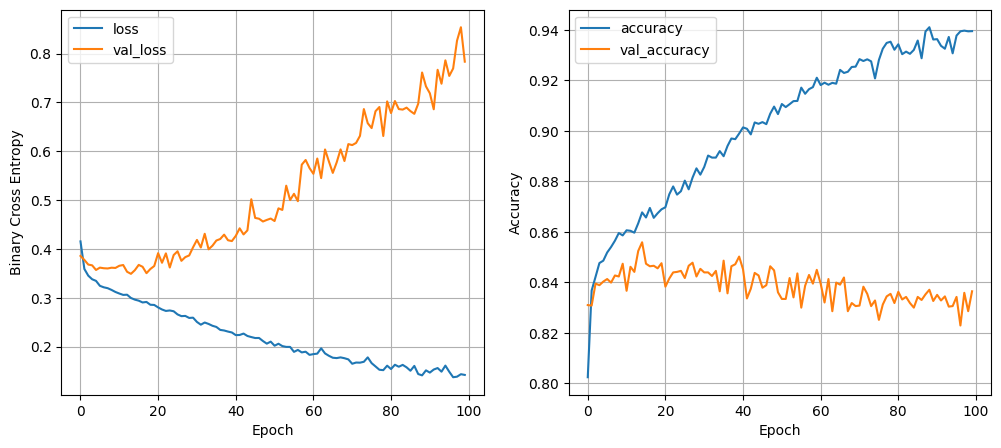

155/155 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.8364
num_nodes:64,dropout_prob:0,lr:0.005,batchsize:32


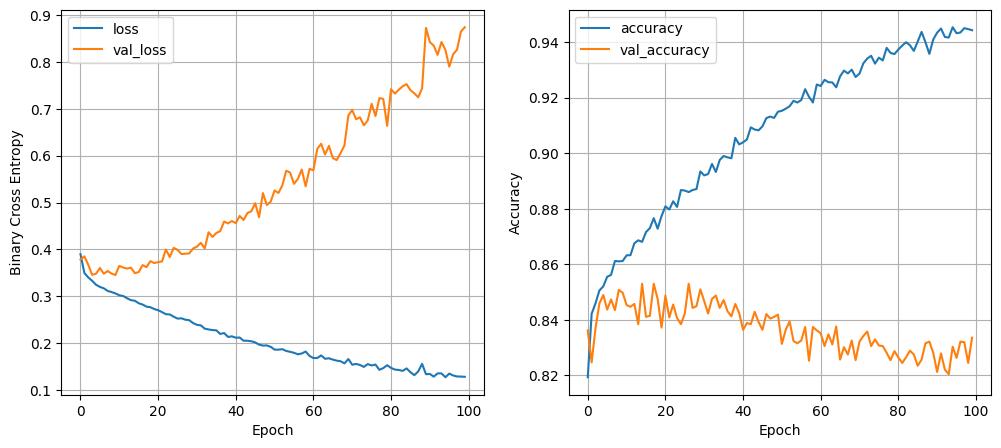

155/155 [==============================] - 0s 3ms/step - loss: 0.8745 - accuracy: 0.8336
num_nodes:64,dropout_prob:0,lr:0.005,batchsize:64


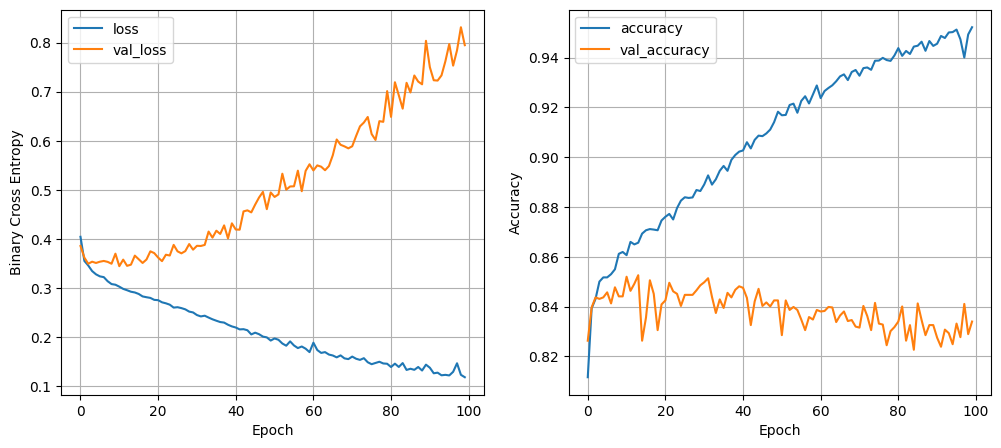

155/155 [==============================] - 0s 3ms/step - loss: 0.7947 - accuracy: 0.8340
num_nodes:64,dropout_prob:0,lr:0.005,batchsize:128


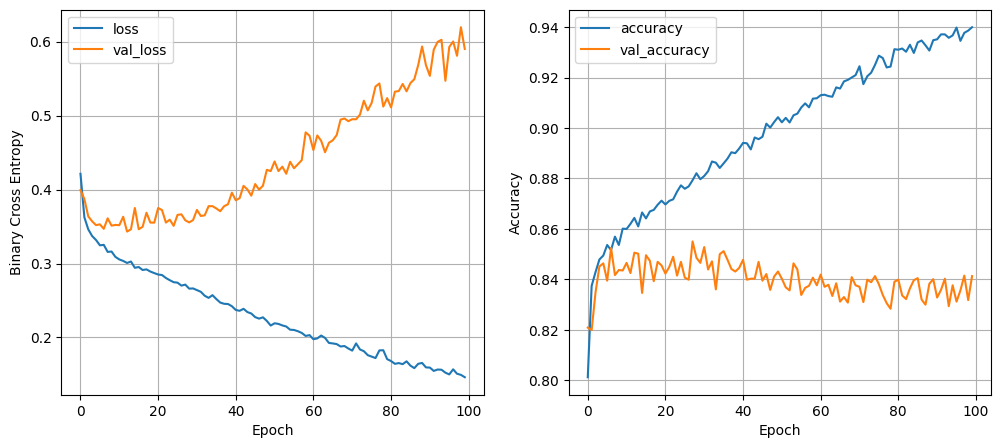

155/155 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.8413
num_nodes:64,dropout_prob:0,lr:0.001,batchsize:32


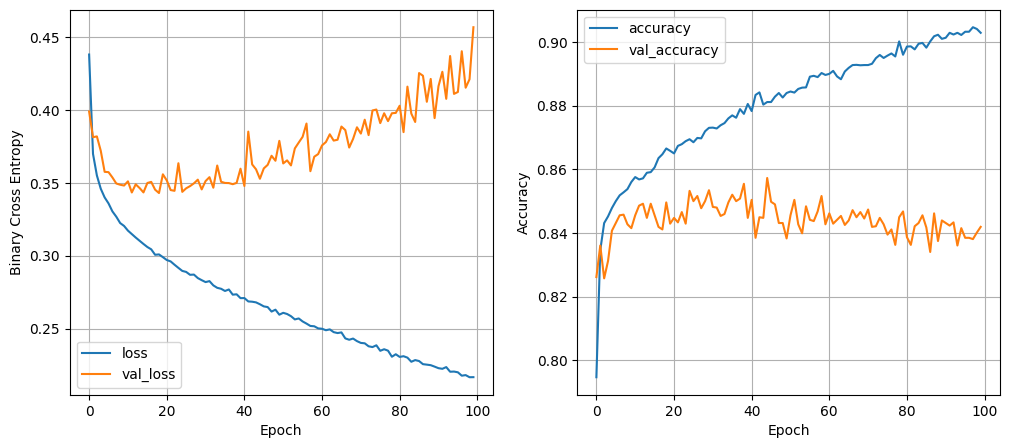

155/155 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8419
num_nodes:64,dropout_prob:0,lr:0.001,batchsize:64


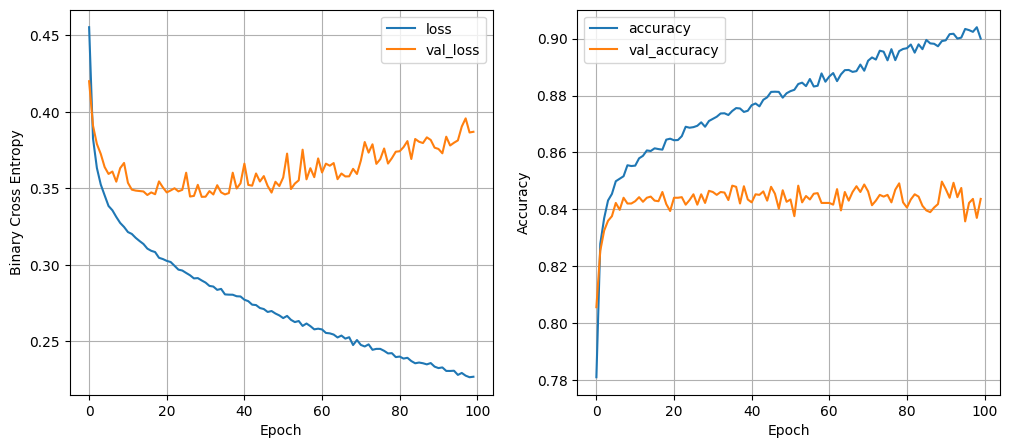

155/155 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8437
num_nodes:64,dropout_prob:0,lr:0.001,batchsize:128


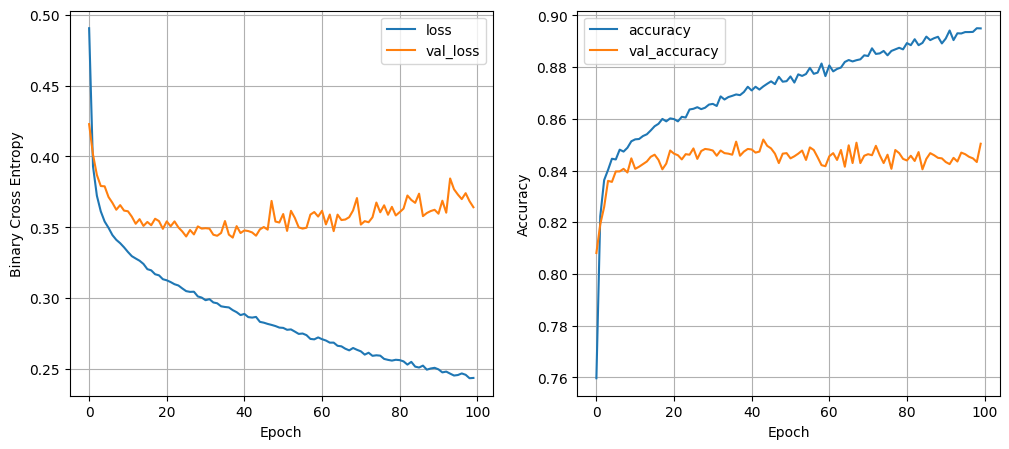

155/155 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8504
num_nodes:64,dropout_prob:0.2,lr:0.01,batchsize:32


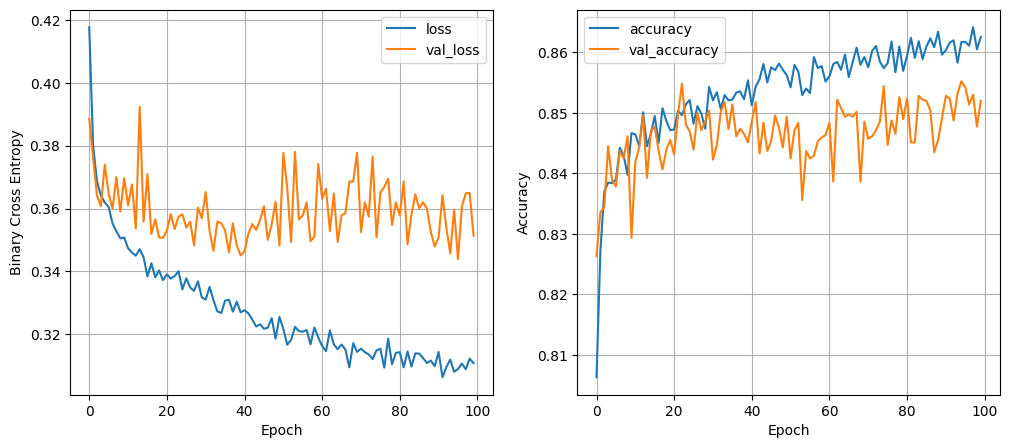

155/155 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8520
num_nodes:64,dropout_prob:0.2,lr:0.01,batchsize:64


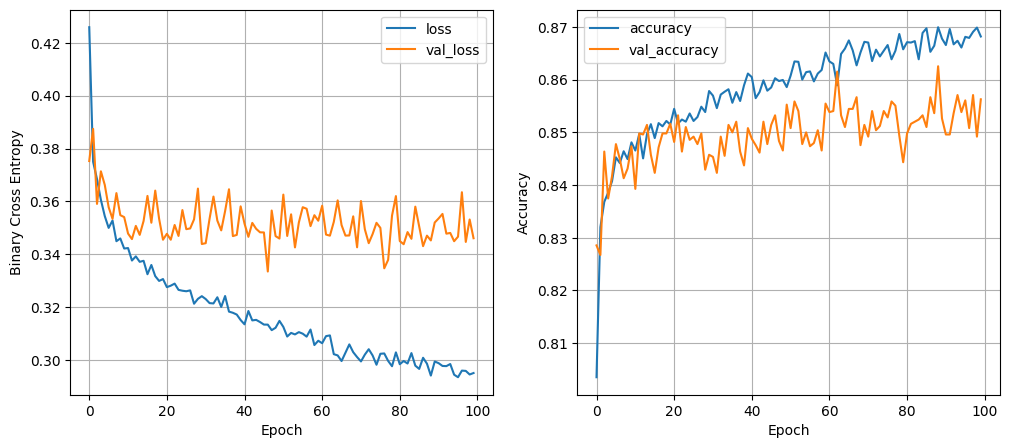

155/155 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8562
num_nodes:64,dropout_prob:0.2,lr:0.01,batchsize:128


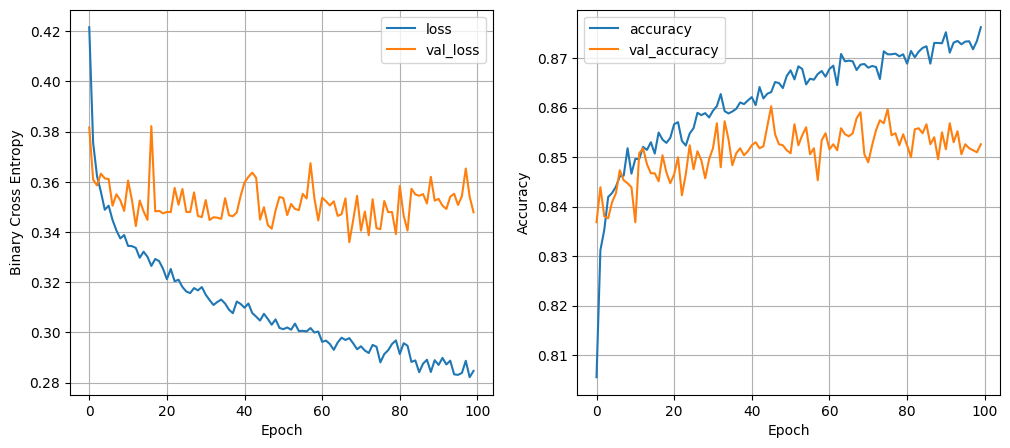

155/155 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8526
num_nodes:64,dropout_prob:0.2,lr:0.005,batchsize:32


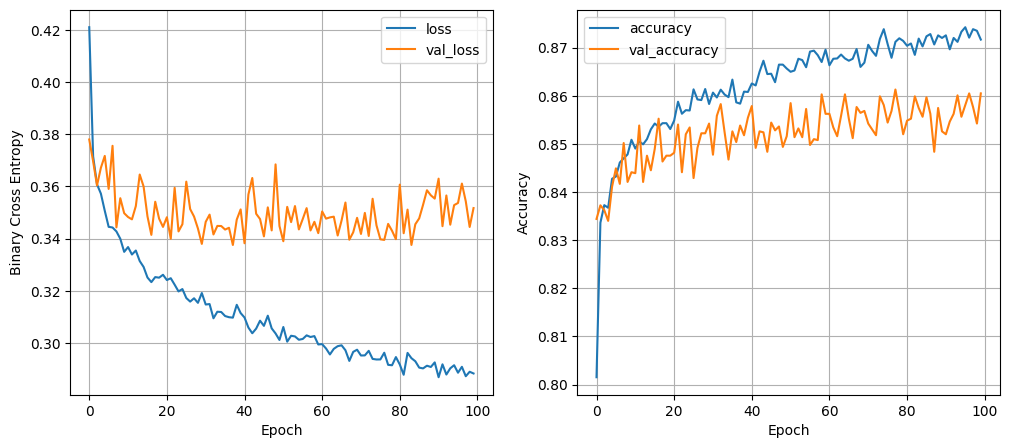

155/155 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8605
num_nodes:64,dropout_prob:0.2,lr:0.005,batchsize:64


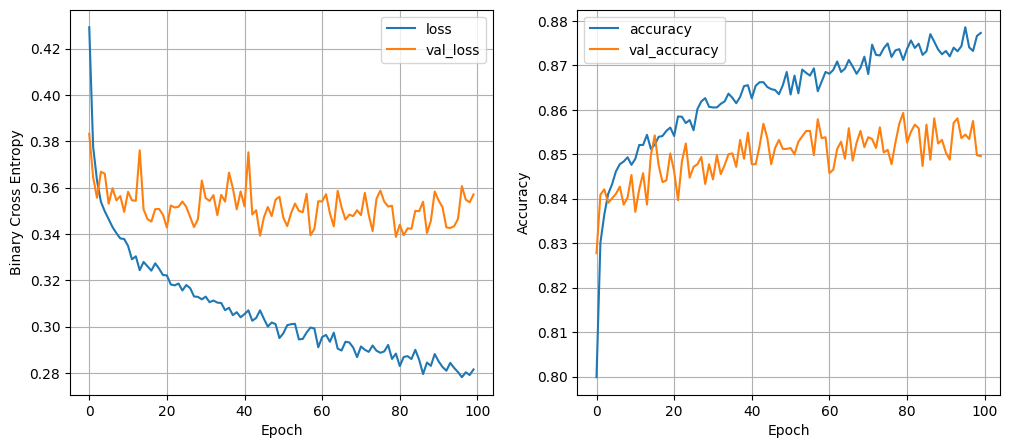

155/155 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8496
num_nodes:64,dropout_prob:0.2,lr:0.005,batchsize:128


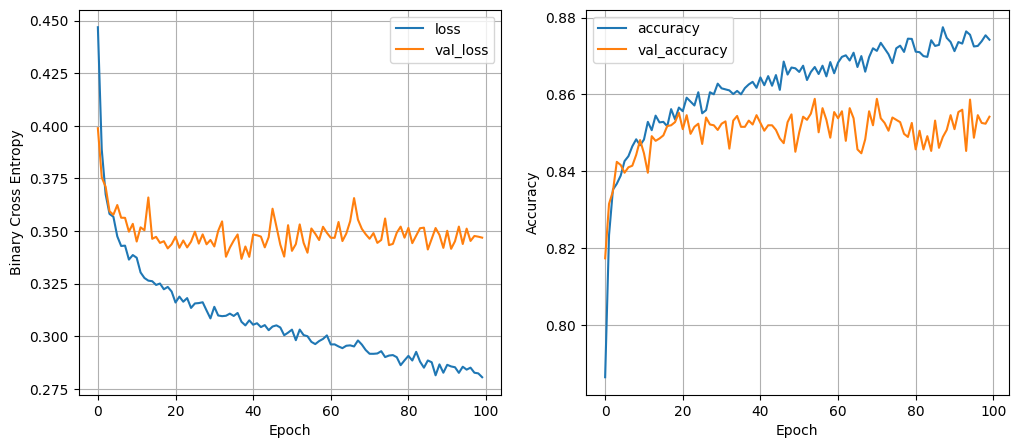

155/155 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8542
num_nodes:64,dropout_prob:0.2,lr:0.001,batchsize:32


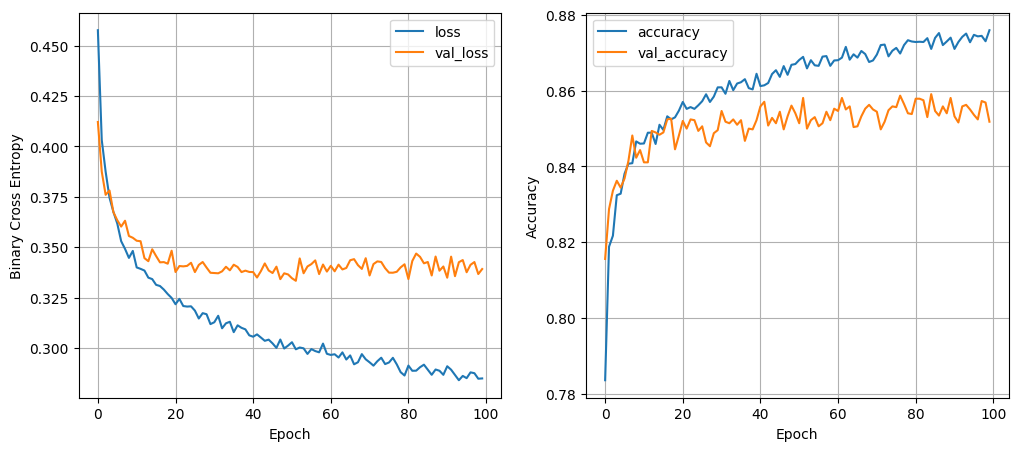

155/155 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8518
num_nodes:64,dropout_prob:0.2,lr:0.001,batchsize:64


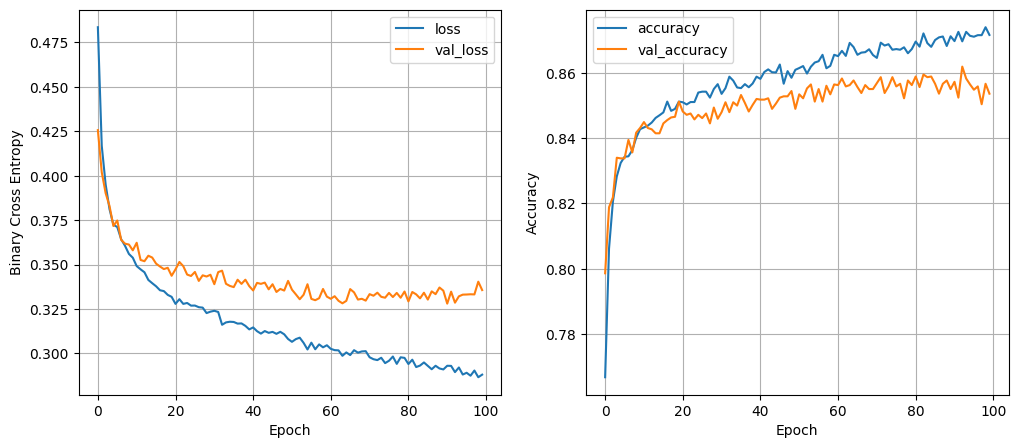

155/155 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8536
num_nodes:64,dropout_prob:0.2,lr:0.001,batchsize:128


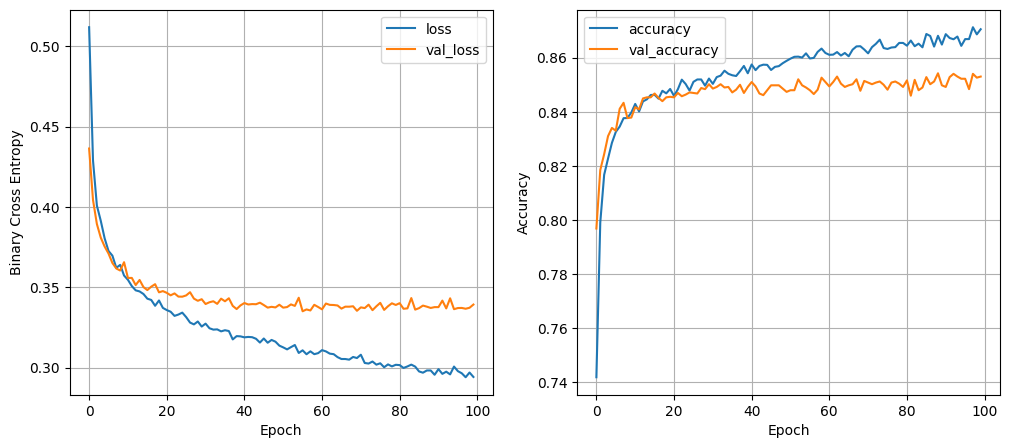

155/155 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8530


In [36]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01,0.005,0.001]:
      for batchsize in [32,64,128]:
        print(f'num_nodes:{num_nodes},dropout_prob:{dropout_prob},lr:{lr},batchsize:{batchsize}')
        model, history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batchsize,epochs,x_val,y_val)
        plot_history(history)
        val_loss=model.evaluate(x_val,y_val)[0]
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [38]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

154/154 [==============================] - 0s 1ms/step


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2460
           1       0.83      0.89      0.86      2460

    accuracy                           0.85      4920
   macro avg       0.85      0.85      0.85      4920
weighted avg       0.85      0.85      0.85      4920

